In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("data/retail_data.csv")
# df = pd.DataFrame(data)

In [2]:
data.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [3]:
data.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [5]:
data.shape

(302010, 30)

In [6]:
data.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [7]:
data.columns[0]

'Transaction_ID'

In [8]:
# delete 不重要欄位 
# 'Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'Zipcode'
data = data.drop(columns = ['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'Zipcode'])

In [9]:
data.columns

Index(['City', 'State', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [12]:
for i in range(len(data.columns)):
    data_uni_num = data.iloc[:,i].nunique()
    print(data.columns[i] + "獨特數量:" + str(data_uni_num))

City獨特數量:130
State獨特數量:54
Country獨特數量:5
Age獨特數量:53
Gender獨特數量:2
Income獨特數量:3
Customer_Segment獨特數量:3
Date獨特數量:366
Year獨特數量:2
Month獨特數量:12
Time獨特數量:83677
Total_Purchases獨特數量:10
Amount獨特數量:299297
Total_Amount獨特數量:299305
Product_Category獨特數量:5
Product_Brand獨特數量:18
Product_Type獨特數量:33
Feedback獨特數量:4
Shipping_Method獨特數量:3
Payment_Method獨特數量:4
Order_Status獨特數量:4
Ratings獨特數量:5
products獨特數量:318


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   City              301762 non-null  object 
 1   State             301729 non-null  object 
 2   Country           301739 non-null  object 
 3   Age               301837 non-null  float64
 4   Gender            301693 non-null  object 
 5   Income            301720 non-null  object 
 6   Customer_Segment  301795 non-null  object 
 7   Date              301651 non-null  object 
 8   Year              301660 non-null  float64
 9   Month             301737 non-null  object 
 10  Time              301660 non-null  object 
 11  Total_Purchases   301649 non-null  float64
 12  Amount            301653 non-null  float64
 13  Total_Amount      301660 non-null  float64
 14  Product_Category  301727 non-null  object 
 15  Product_Brand     301729 non-null  object 
 16  Product_Type      30

In [31]:
# 觀察時間與地點類型以外的欄位
data[["Age", 
"Gender", 
"Income", 
"Customer_Segment", 
"Total_Purchases", 
"Product_Category", 
"Product_Brand", 
"Product_Type", 
"Feedback", 
"Shipping_Method", 
"Payment_Method",
"Order_Status",
"Ratings",
"products"]].head()

,Age,Gender,Income,Customer_Segment,Total_Purchases,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,21.0,Male,Low,Regular,3.0,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,19.0,Female,Low,Premium,2.0,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,48.0,Male,Low,Regular,3.0,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,56.0,Male,High,Premium,7.0,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,22.0,Male,Low,Premium,2.0,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [16]:
np.sort(data["Age"].unique())

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., nan])

In [18]:
data["Income"].unique()

array(['Low', 'High', 'Medium', nan], dtype=object)

In [19]:
data["Customer_Segment"].unique()

array(['Regular', 'Premium', 'New', nan], dtype=object)

In [21]:
np.sort(data["Total_Purchases"].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., nan])

In [22]:
data["Product_Category"].unique()

array(['Clothing', 'Electronics', 'Books', 'Home Decor', 'Grocery', nan],
      dtype=object)

In [23]:
data["Product_Brand"].unique()

array(['Nike', 'Samsung', 'Penguin Books', 'Home Depot', 'Nestle',
       'Apple', 'Zara', 'Random House', 'Coca-Cola', 'Adidas', 'Pepsi',
       'IKEA', 'HarperCollins', 'Bed Bath & Beyond', 'Sony', nan,
       'Whirepool', 'Mitsubhisi', 'BlueStar'], dtype=object)

In [24]:
data["Product_Type"].unique()

array(['Shorts', 'Tablet', "Children's", 'Tools', 'Chocolate',
       'Television', 'Shirt', 'Decorations', 'Non-Fiction', 'Water',
       'Snacks', 'T-shirt', 'Literature', 'Juice', 'Furniture', 'Coffee',
       'Bathroom', 'Kitchen', 'Smartphone', 'Shoes', 'Thriller',
       'Soft Drink', 'Laptop', 'Dress', 'Headphones', 'Lighting',
       'Bedding', 'Jacket', 'Fiction', 'Jeans', 'Fridge',
       'Mitsubishi 1.5 Ton 3 Star Split AC', 'BlueStar AC'], dtype=object)

In [25]:
data["Feedback"].unique()

array(['Excellent', 'Average', 'Bad', 'Good', nan], dtype=object)

In [26]:
data["Shipping_Method"].unique()

array(['Same-Day', 'Standard', 'Express', nan], dtype=object)

In [27]:
data["Payment_Method"].unique()

array(['Debit Card', 'Credit Card', 'PayPal', 'Cash', nan], dtype=object)

In [28]:
data["Order_Status"].unique()

array(['Shipped', 'Processing', 'Pending', 'Delivered', nan], dtype=object)

In [29]:
np.sort(data["Ratings"].unique())

array([ 1.,  2.,  3.,  4.,  5., nan])

In [30]:
data["products"].unique()

array(['Cycling shorts', 'Lenovo Tab', 'Sports equipment',
       'Utility knife', 'Chocolate cookies', 'QLED TV', 'Dress shirt',
       'Dark chocolate', 'Candles', 'Screwdriver set', 'Science',
       'Bottled water', 'Fruit snacks', 'V-neck tee', 'Drama',
       'Flavored water', 'Samsung Galaxy Tab', 'Orange juice',
       'Bookshelf', 'Affogato', 'Business', 'Self-help', 'Sink',
       'Grape juice', 'Stove', 'Huawei P', 'Amazon Fire Tablet',
       'Curtains', 'Pomegranate juice', 'Running shoes',
       'Political thriller', 'Google Pixel', 'Chocolate mousse', 'Vases',
       'Henley shirt', 'Toys', 'Iced tea', 'Apple juice',
       'Microsoft Surface Laptop', 'Desk', 'Bodycon dress',
       'Sports headphones', 'Pendant lights', 'Clocks', 'Comforter',
       'Peacoat', 'Bed', 'White chocolate', 'Android TV',
       'Studio headphones', 'Sneakers', 'Sculptures', 'Cream soda',
       'History', 'Pliers', 'Oxfords', 'Short stories', 'Dining table',
       'Cooking', 'Wall art', 'M

In [55]:
# GPT修正版
# import pickle
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# class AutoPreprocess:
#     def __init__(self):         
#         self.scaler = {}
#         self.fillna_value = {}
#         self.onehotencode_value = {}
#         self.field_names = []
#         self.final_field_names = []
        
#     def fit(self, data, field_names):
#         self.__init__()
#         self.field_names = field_names       
        
#         for fname in field_names:
#             #自動補空值
#             if (data[fname].dtype == object) or (data[fname].dtype == str): #字串型態欄位
#                 # self.fillna_value[fname] = data[fname].mode()[0] #補眾數
#                 self.fillna_value[fname] = 'np.nan'
#                 # self.fillna_value[fname] = np.nan # 維持空值
#             elif data[fname].dtype == bool: #布林型態
#                 self.fillna_value[fname] = data[fname].mode()[0] #補眾數
#             else: # 數字型態
#                 self.fillna_value[fname] = data[fname].median()  #補中位數
            
#             #自動尺度轉換(scaling)
#             if (data[fname].dtype == object) or (data[fname].dtype == str): #字串型態欄位
#                 pass #不用轉換
#             elif data[fname].dtype == bool: #布林型態
#                 pass #不用轉換
#             else: # 數字型態
#                 vc = data[fname].value_counts()
#                 if data[fname].isin([0, 1]).all(): #當數值只有0跟1
#                     pass #不用轉換
#                 elif pd.api.types.is_integer_dtype(data[fname]) and data[fname].nunique() <= 10: #是否簡單的整數型類別且數量小於10
#                     self.scaler[fname] = MinMaxScaler()    
#                     self.scaler[fname].fit(data[[fname]])
#                 else: #其他的數字型態
#                     self.scaler[fname] = StandardScaler()    
#                     self.scaler[fname].fit(data[[fname]])

            
#             #自動編碼
#             if (data[fname].dtype == object) or (data[fname].dtype == str): #字串型態欄位, onehotencode
#                 field_value = data[fname].value_counts().index
#                 self.onehotencode_value[fname] = field_value
#                 for value in field_value:
#                     fn = fname+"_"+value
#                     # data[fn] = (data[fname] == value).astype('int8')
#                     self.final_field_names.append(fn)                    
#             elif data[fname].dtype == bool: #布林型態 轉成0跟1
#                 # data[fname] = data[fname].astype(int)
#                 self.final_field_names.append(fname)
#             else: # 數字型態 不用重新編碼
#                 self.final_field_names.append(fname)
                
#         return

#     def transform(self, data):
#         # 如果輸入的data是dict，要先轉成dataframe
#         if isinstance(data, dict):
#             temp_data = {}
#             for fname in self.field_names:
#                 if fname in data:
#                     temp_data[fname] = [data[fname]]
#                 else:
#                     temp_data[fname] = [np.nan]
#             data = pd.DataFrame(temp_data)
#         else:  # 將資料複製一份，不修改原本的資料
#             data = data.copy()
        
#         # 建立要合併的 DataFrames 列表
#         dfs_to_concat = []
        
#         for fname in self.field_names:
#             # 自動補空值
#             if data[fname].isnull().any():
#                 data[fname] = data[fname].fillna(self.fillna_value[fname])
            
#             # 自動尺度轉換(scaling)
#             if fname in self.scaler:
#                 scaled_data = pd.DataFrame(
#                     self.scaler[fname].transform(data[[fname]]),
#                     columns=[fname],
#                     index=data.index
#                 )
#                 dfs_to_concat.append(scaled_data)
#                 continue
            
#             # 自動編碼
#             if (data[fname].dtype == object) or (data[fname].dtype == str):
#                 if fname in self.onehotencode_value:
#                     field_value = self.onehotencode_value[fname]
#                     for value in field_value:
#                         fn = fname + "_" + value
#                         encoded_col = pd.DataFrame(
#                             {fn: (data[fname] == value).astype('int8')},
#                             index=data.index
#                         )
#                         dfs_to_concat.append(encoded_col)
#             elif data[fname].dtype == bool:
#                 bool_col = pd.DataFrame(
#                     {fname: data[fname].astype(int)},
#                     index=data.index
#                 )
#                 dfs_to_concat.append(bool_col)
#             else:  # 數字型態 不用重新編碼
#                 dfs_to_concat.append(pd.DataFrame(
#                     {fname: data[fname]},
#                     index=data.index
#                 ))
        
#         # 使用 concat 一次性合併所有轉換後的欄位
#         result = pd.concat(dfs_to_concat, axis=1)
        
#         # 只返回最終需要的欄位
#         return result[self.final_field_names]

#     def save(self, file_name):
#         with open(file_name, "wb") as f:
#             pickle.dump(self, f)

#     @staticmethod
#     def load(file_name):
#         with open(file_name, "rb") as f:
#             return pickle.load(f)          

In [40]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
class AutoPreprocess:
    def __init__(self):         
        self.scaler = {}
        self.fillna_value = {}
        self.onehotencode_value = {}
        self.field_names = []
        self.final_field_names = []
        
    def fit(self, data, field_names):
        self.__init__()
        self.field_names = field_names       
        
        for fname in field_names:
            #自動補空值
            if (data[fname].dtype == object) or (data[fname].dtype == str): #字串型態欄位
                # self.fillna_value[fname] = data[fname].mode()[0] #補眾數
                self.fillna_value[fname] = 'np.nan'
                # self.fillna_value[fname] = np.nan # 維持空值
            elif data[fname].dtype == bool: #布林型態
                self.fillna_value[fname] = data[fname].mode()[0] #補眾數
            else: # 數字型態
                self.fillna_value[fname] = data[fname].median()  #補中位數
            
            #自動尺度轉換(scaling)
            if (data[fname].dtype == object) or (data[fname].dtype == str): #字串型態欄位
                pass #不用轉換
            elif data[fname].dtype == bool: #布林型態
                pass #不用轉換
            else: # 數字型態
                vc = data[fname].value_counts()
                if data[fname].isin([0, 1]).all(): #當數值只有0跟1
                    pass #不用轉換
                elif pd.api.types.is_integer_dtype(data[fname]) and data[fname].nunique() <= 10: #是否簡單的整數型類別且數量小於10
                    self.scaler[fname] = MinMaxScaler()    
                    self.scaler[fname].fit(data[[fname]])
                else: #其他的數字型態
                    self.scaler[fname] = StandardScaler()    
                    self.scaler[fname].fit(data[[fname]])

            
            #自動編碼
            if (data[fname].dtype == object) or (data[fname].dtype == str): #字串型態欄位, onehotencode
                field_value = data[fname].value_counts().index
                self.onehotencode_value[fname] = field_value
                for value in field_value:
                    fn = fname+"_"+value
                    # data[fn] = (data[fname] == value).astype('int8')
                    self.final_field_names.append(fn)                    
            elif data[fname].dtype == bool: #布林型態 轉成0跟1
                # data[fname] = data[fname].astype(int)
                self.final_field_names.append(fname)
            else: # 數字型態 不用重新編碼
                self.final_field_names.append(fname)
                
        return

    def transform(self, data):
        #如果輸入的data是dict，要先轉成dataframe
        if isinstance(data, dict):
            for fname in self.field_names:
                if fname in data:
                    data[fname] = [data[fname]]
                else:
                    data[fname] = [np.nan]
            data = pd.DataFrame(data)
        else: #將資料複製一份，不修改原本的資料
            data = data.copy()
        
        for fname in self.field_names:
            #自動補空值
            if data[fname].isnull().any(): #有空值
                # if fname in self.fillna_value:
                    data[fname] = data[fname].fillna(self.fillna_value[fname])


            #自動尺度轉換(scaling)
            if fname in self.scaler:
                data[fname] = self.scaler[fname].transform(data[[fname]])
            
            #自動編碼
            if (data[fname].dtype == object) or (data[fname].dtype == str): #字串型態欄位, onehotencode
                if fname in self.onehotencode_value:                   
                    field_value = self.onehotencode_value[fname]
                for value in field_value:
                    fn = fname+"_"+value
                    data[fn] = (data[fname] == value).astype('int8')
            elif data[fname].dtype == bool: #布林型態 轉成0跟1
                data[fname] = data[fname].astype(int)
            else: # 數字型態 不用重新編碼
                pass                
        return data[self.final_field_names]

    def save(self, file_name):
        with open(file_name, "wb") as f:
            pickle.dump(self, f)

    @staticmethod
    def load(file_name):
        with open(file_name, "rb") as f:
            return pickle.load(f)          

In [54]:
data[["Age", 
            "Gender", 
            "Income", 
            "Customer_Segment", 
            "Total_Purchases", 
            "Product_Category", 
            "Product_Brand", 
            "Product_Type", 
            "Feedback", 
            "Shipping_Method", 
            "Payment_Method",
            "Order_Status",
            "Ratings",
            "products"]].head()

,Age,Gender,Income,Customer_Segment,Total_Purchases,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,21.0,Male,Low,Regular,3.0,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,19.0,Female,Low,Premium,2.0,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,48.0,Male,Low,Regular,3.0,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,56.0,Male,High,Premium,7.0,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,22.0,Male,Low,Premium,2.0,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [ ]:
# 最終處理方式建議
# 欄位	資料型態	建議處理方式
# Age	數值型	標準化（Z-score）
# Income	數值型	標準化（Z-score）
# Total_Purchases	數值型	標準化（Z-score）
# Ratings	數值型	標準化（Z-score）
# Customer_Segment	類別型（有序）	Ordinal Encoding
# Order_Status	類別型（有序）	Ordinal Encoding
# Gender	類別型（無序）	One-Hot Encoding
# Product_Category	類別型（無序）	One-Hot Encoding
# Product_Brand	類別型（無序）	One-Hot Encoding
# Product_Type	類別型（無序）	One-Hot Encoding
# Shipping_Method	類別型（無序）	One-Hot Encoding
# Payment_Method	類別型（無序）	One-Hot Encoding
# Feedback	文字型（情感分析）	Label Encoding（Excellent=3, Average=2, Bad=1）
# products	文字型	可能刪除或使用 TF-IDF

In [41]:
ap = AutoPreprocess()
ap.fit(data, ["Age", 
            "Gender", 
            "Income", 
            "Customer_Segment", 
            "Total_Purchases", 
            "Product_Category", 
            "Product_Brand", 
            "Product_Type", 
            "Feedback", 
            "Shipping_Method", 
            "Payment_Method",
            "Order_Status",
            "Ratings",
            "products"])

In [42]:
ap_data = ap.transform(data)
print(type(ap_data))

C:\Users\gn012\AppData\Local\Temp\ipykernel_7080\798783469.py:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[fn] = (data[fname] == value).astype('int8')
C:\Users\gn012\AppData\Local\Temp\ipykernel_7080\798783469.py:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[fn] = (data[fname] == value).astype('int8')
C:\Users\gn012\AppData\Local\Temp\ipykernel_7080\798783469.py:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# 問題點!! OHE以後，多了許多欄位相似，根本就沒有意義，有些欄位應該是可以用大小0~5之類排序，像是客戶等級或是評分標準

In [43]:
ap_data.head()

,Age,Gender_Male,Gender_Female,Income_Medium,Income_Low,Income_High,Customer_Segment_Regular,Customer_Segment_New,Customer_Segment_Premium,Total_Purchases,...,products_Fruit snacks,products_Granola bars,products_Pretzels,products_Toys,products_Shower,products_Screwdriver set,products_Towel rack,products_Razer Blade,products_Parka,products_Package AC
0,-0.964014,1,0,0,1,0,1,0,0,-0.822615,...,0,0,0,0,0,0,0,0,0,0
1,-1.097153,0,1,0,1,0,0,0,1,-1.171221,...,0,0,0,0,0,0,0,0,0,0
2,0.833361,1,0,0,1,0,1,0,0,-0.822615,...,0,0,0,0,0,0,0,0,0,0
3,1.365917,1,0,0,0,1,0,0,1,0.571808,...,0,0,0,0,0,0,0,0,0,0
4,-0.897444,1,0,0,1,0,0,0,1,-1.171221,...,0,0,0,0,0,0,0,0,0,0


In [44]:
ap_data.shape

(302010, 400)

In [46]:
corr_matrix = ap_data.corr()  # 計算相關係數矩陣
print(corr_matrix)

                               Age  Gender_Male  Gender_Female  Income_Medium  \
Age                       1.000000    -0.027623       0.027407      -0.041970   
Gender_Male              -0.027623     1.000000      -0.997771      -0.016783   
Gender_Female             0.027407    -0.997771       1.000000       0.016733   
Income_Medium            -0.041970    -0.016783       0.016733       1.000000   
Income_Low                0.128543    -0.005204       0.005193      -0.595560   
...                            ...          ...            ...            ...   
products_Screwdriver set -0.000892    -0.002260       0.002196      -0.002496   
products_Towel rack      -0.001609     0.000221      -0.000128       0.002395   
products_Razer Blade     -0.002718     0.001852      -0.001919       0.002534   
products_Parka            0.001624    -0.002727       0.002661       0.003652   
products_Package AC       0.015342    -0.000382       0.000441      -0.002747   

                          I

In [47]:
# 篩選出 >0.2 或 < -0.2 的相關係數
filtered_corr = corr_matrix[(corr_matrix > 0.2) | (corr_matrix < -0.2)]

# 只保留上三角 (避免重複列出變數對，例如 A-B 和 B-A)
filtered_corr = filtered_corr.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 展平並顯示結果
related_pairs = filtered_corr.stack()
print(related_pairs)


Age                      Customer_Segment_Premium    0.212759
Gender_Male              Gender_Female              -0.997771
Income_Medium            Income_Low                 -0.595560
                         Income_High                -0.501486
Income_Low               Income_High                -0.393954
                                                       ...   
Order_Status_Delivered   Order_Status_Processing    -0.421492
                         Order_Status_Pending       -0.384224
Order_Status_Shipped     Order_Status_Processing    -0.253194
                         Order_Status_Pending       -0.230807
Order_Status_Processing  Order_Status_Pending       -0.212987
Length: 480, dtype: float64


In [51]:
# 篩選 |相關係數| > 0.2 但 < 0.99（避免過強的獨熱編碼影響）
filtered_corr = corr_matrix[(corr_matrix.abs() > 0.2) & (corr_matrix.abs() < 0.99)]

# 只保留上三角，避免重複
filtered_corr = filtered_corr.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 展平成 Series
related_pairs = filtered_corr.stack()

# 進一步過濾：排除同類別的獨熱編碼變數（透過字串匹配）
filtered_pairs = related_pairs[~(
    (related_pairs.index.get_level_values(0).str.split('_').str[0] ==
     related_pairs.index.get_level_values(1).str.split('_').str[0])
)]

# 顯示結果
print(filtered_pairs)



Age                       Customer_Segment_Premium               0.212759
Product_Brand_Whirepool   Feedback_Good                          0.227469
                          products_French door refrigerator      0.321310
                          products_Counter-depth refrigerator    0.319255
                          products_Compact refrigerator          0.316770
                                                                   ...   
Product_Type_Snacks       products_Pretzels                      0.306950
Product_Type_BlueStar AC  products_Package AC                    0.313339
Feedback_Excellent        Ratings                                0.715470
Feedback_Average          Ratings                               -0.450551
Feedback_Bad              Ratings                               -0.670019
Length: 345, dtype: float64


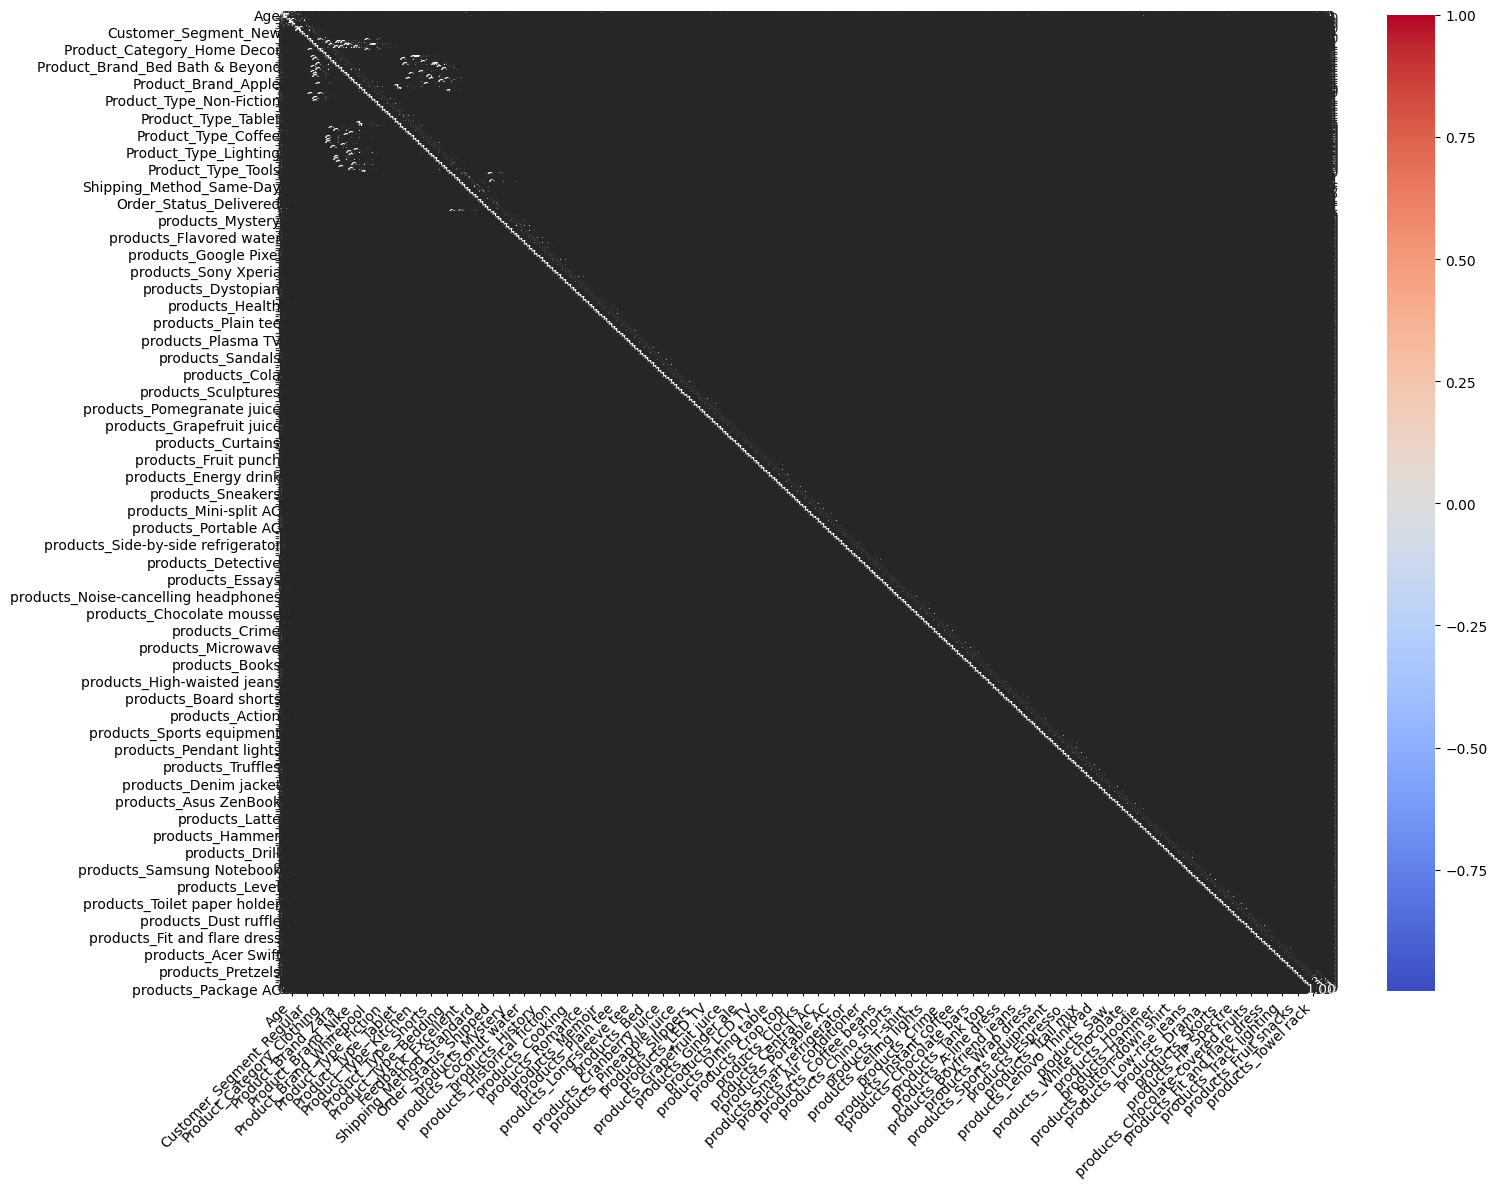

In [38]:
# 設定圖表大小
plt.figure(figsize=(16, 12))

# 繪製熱圖
ax = sns.heatmap(ap_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# 旋轉 X 軸標籤，確保不重疊
plt.xticks(rotation=45, ha="right")

# 確保圖表不會被裁剪
plt.tight_layout()

# # 儲存圖片
# plt.savefig("heatmap_new.png", dpi=300)

# 顯示圖片
plt.show()